In [2]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os
import soundfile
import librosa
from utils import *

## Audio MNIST

In [7]:
# folder_path = "data/audio/fold1"
folder_path = "data/mnist"
# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

sr , _ = wavfile.read(folder_path + "/" + sample_file[0])
print("Sample rate of the audio file: ", sr)
y, sr = librosa.load(folder_path + "/" + sample_file[0], sr=sr)
plt.plot(y);
plt.title(sample_file[0]);
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

PermissionError: [Errno 13] Permission denied: 'data/mnist/47'

In [5]:
audio_data = load_data('data/mnist')

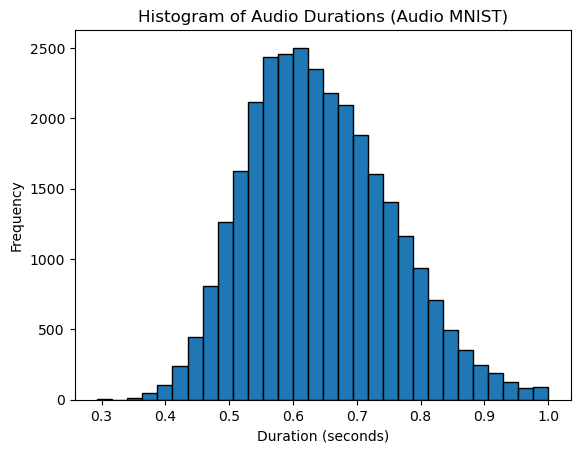

In [13]:
sr = 48000
durations = [len(audio)/sr for audio,sr,_ in audio_data]

plt.hist(durations, bins=30, edgecolor='black')
plt.title('Histogram of Audio Durations (Audio MNIST)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


In [14]:
max_duration = np.argmax(durations)
min_duration = np.argmin(durations)
print('Longest audio file:', all_files[max_duration], 'Duration:', durations[max_duration], 'seconds')
print('Shortest audio file:', all_files[min_duration], 'Duration:', durations[min_duration], 'seconds')

IndexError: list index out of range

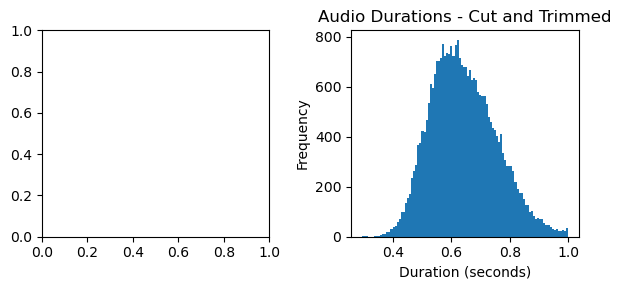

In [16]:


durations_trimmed = [len(audio)/sr for audio, _ ,_ in audio_data]


fig, axs = plt.subplots(1, 2, figsize=(6, 3))

# # Plot the first histogram
# axs[0].hist(durations_cut, bins=100)
# axs[0].set_title('Audio Durations - Cut')
# axs[0].set_xlabel('Duration (seconds)')
# axs[0].set_ylabel('Frequency')

# Plot the second histogram
axs[1].hist(durations_trimmed, bins=100)
axs[1].set_title('Audio Durations - Cut and Trimmed')
axs[1].set_xlabel('Duration (seconds)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
audios = [audio for audio, _, _ in audio_data]
print(np.max([len(audio) for audio in audios]))

47998


In [3]:
folder_path = "data/mnist/data_spec"
# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

spec_db = np.load(f'{folder_path}/{sample_file[0]}')

In [4]:
spec_db.shape

(1025, 45)

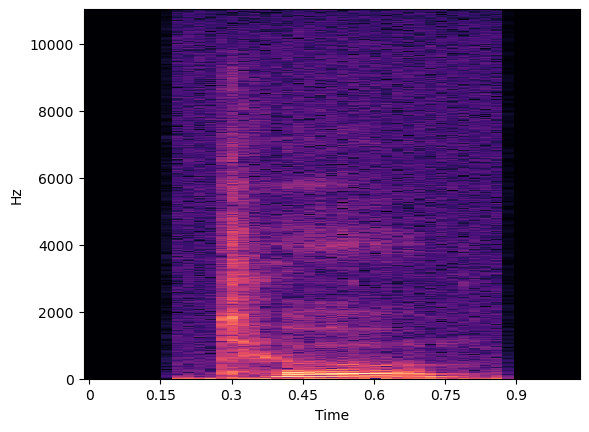

In [5]:
sr = 48000
img = librosa.display.specshow(spec_db, x_axis='time', y_axis='linear', fmax=sr//2, fmin=0, cmap='magma')

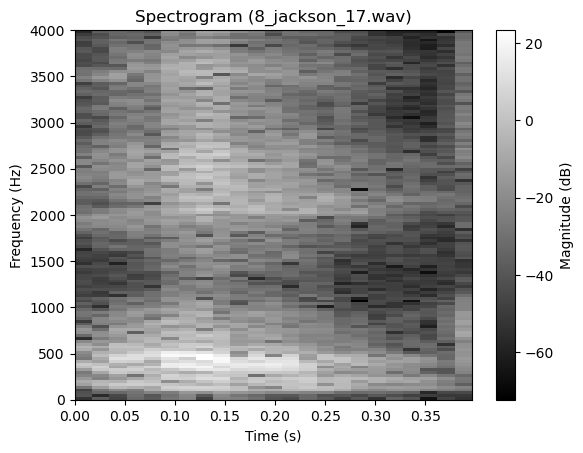

In [4]:
for audio, name in audio_data:
    if name == "8_jackson_17.wav":
        y = audio
        break

# y = audio_data[16][0]
spec = stft(y, frame_size=256, overlap=128)
epsilon = 1e-4
spec_db = np.array(20 * np.log10(np.abs(spec) + epsilon))
sr = 8000
n_frames_spec = spec_db.shape[1] 
time_spec = np.linspace(0, len(y)/sr, n_frames_spec)
plt.imshow(spec_db, aspect='auto', origin='lower', extent=[0, len(y)/sr, 0, sr//2], cmap='gray', interpolation='none')
plt.xlim([0, len(y)/sr])
plt.title(f"Spectrogram (8_jackson_17.wav)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude (dB)")
plt.xlabel("Time (s)")
plt.show()


In [6]:
max_length = np.max([len(y) for y, _ in audio_data])

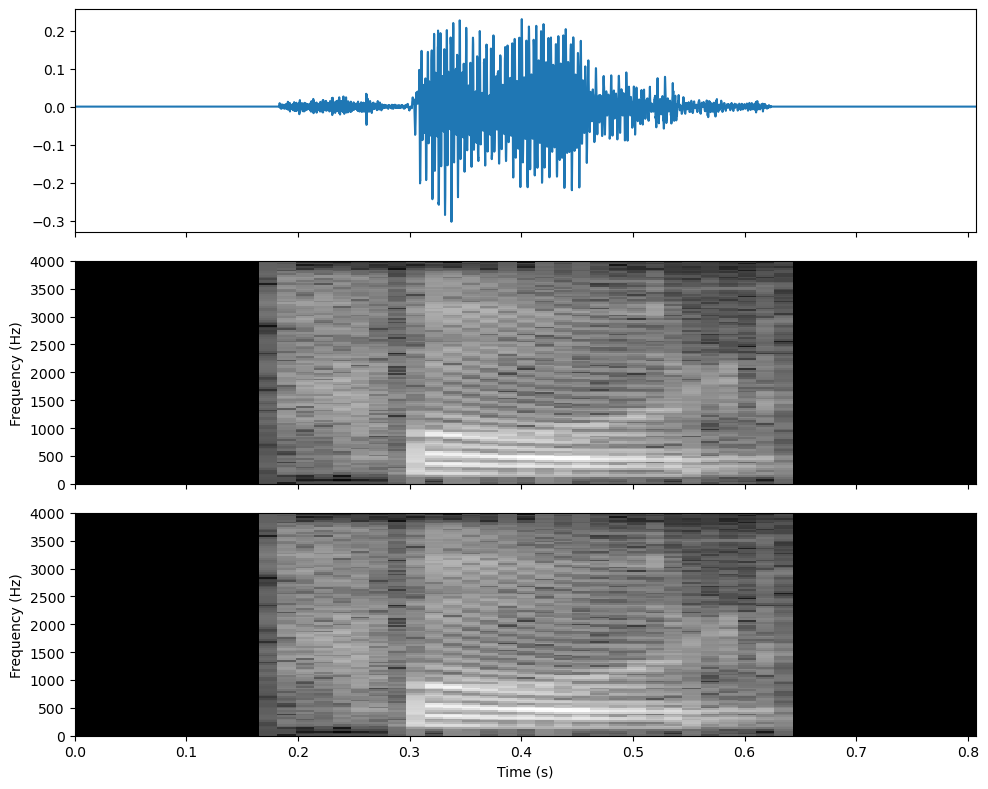

In [11]:
y = audio_data[1227][0]
padded_y = pad_segment(y, 6457)
spec = stft(padded_y, frame_size=256, overlap=128)
epsilon = 1e-4
spec_db = np.array(20 * np.log10(np.abs(spec) + epsilon))
lib = np.abs(librosa.stft(padded_y, n_fft=256, hop_length=256//2, center=False, window = 'hamm'))
lib_db = np.array(20 * np.log10(lib + epsilon))


# Plot the original padded signal with consistent x-axis range
# Time axis for the original signal
time = np.linspace(0, len(padded_y)/sr, len(padded_y))

# Time axis for the spectrograms
n_frames_spec = spec_db.shape[1]  # Number of time frames in your custom spectrogram
n_frames_lib = lib_db.shape[1]  # Number of time frames in the librosa spectrogram

time_spec = np.linspace(0, len(padded_y)/sr, n_frames_spec)
time_lib = np.linspace(0, len(padded_y)/sr, n_frames_lib)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Plot the original padded signal
ax[0].plot(time, padded_y)
ax[0].set_xlim([0, len(padded_y)/sr])
ax[0].label_outer()

# Plot your custom spectrogram with proper time axis
img1 = ax[1].imshow(spec_db, aspect='auto', origin='lower', extent=[0, len(padded_y)/sr, 0, sr//2], cmap='gray', interpolation='none')
ax[1].set_xlim([0, len(padded_y)/sr])
ax[1].set_ylabel("Frequency (Hz)")
ax[1].label_outer()

# Plot the `librosa` spectrogram with proper time axis
img2 = ax[2].imshow(lib_db, aspect='auto', origin='lower', extent=[0, len(padded_y)/sr, 0, sr//2], cmap='gray', interpolation='none')
ax[2].set_xlim([0, len(padded_y)/sr])
ax[2].set_xlabel("Time (s)")
ax[2].set_ylabel("Frequency (Hz)")

# Adjust layout
plt.tight_layout()
plt.show()

Sample rate of the audio file:  8000


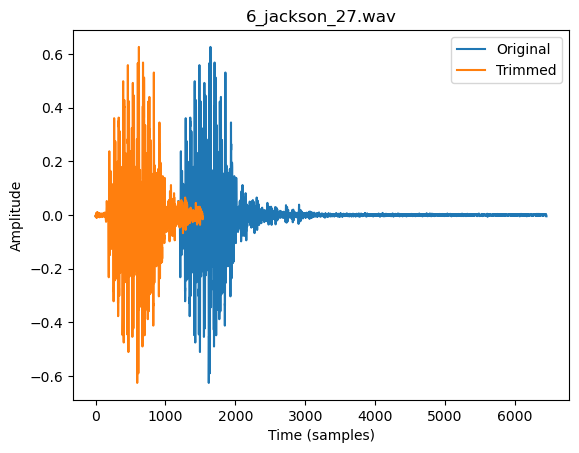

In [12]:
#folder_path = "data/audio/fold1"
folder_path = "data/audioMNIST/data"
# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

sr , _ = wavfile.read(folder_path + "/" + sample_file[0])
print("Sample rate of the audio file: ", sr)
y, sr = librosa.load(folder_path + "/" + sample_file[0], sr=sr)
y_trimmed, idx = librosa.effects.trim(y, frame_length=512, ref=np.mean , top_db=5)

# Plot original y
plt.plot(y, label='Original')
# Plot trimmed y
plt.plot(y[idx[0]:idx[1]], label='Trimmed')
plt.legend()
plt.title(sample_file[0])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude');


## Urbansound

In [ ]:
folder_path = "data/audio/"
audio_data = load_data(folder_path)


In [4]:
from collections import Counter


sr = [sr for audio , sr, file in audio_data]
files = [file for audio , sr, file in audio_data]
files_class = [file.split('-')[1] for file in files]
sr_counter = Counter(files_class)
sr_counter

Counter({'0': 1000,
         '2': 962,
         '5': 921,
         '8': 908,
         '9': 890,
         '3': 872,
         '4': 822,
         '7': 789,
         '1': 393,
         '6': 315})

In [1]:
durations = [len(audio)/sr for audio,sr,_ in audio_data]

plt.hist(durations, bins=30, edgecolor='black')
plt.title('Histogram of Audio Durations (Urbansound8K)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

NameError: name 'audio_data' is not defined

In [5]:
durations = [len(librosa.load(folder_path+"/"+file, sr=sr)[0]) for file in all_files if file.endswith('.wav')]
durations_cut = [x/sr for x in durations if x < 8000]
durations_trimmed = [len(audio)/sr for audio, _ in audio_data]


fig, axs = plt.subplots(1, 2, figsize=(6, 3))

# Plot the first histogram
axs[0].hist(durations_cut, bins=100)
axs[0].set_title('Audio Durations - Cut')
axs[0].set_xlabel('Duration (seconds)')
axs[0].set_ylabel('Frequency')

# Plot the second histogram
axs[1].hist(durations_trimmed, bins=100)
axs[1].set_title('Audio Durations - Cut and Trimmed')
axs[1].set_xlabel('Duration (seconds)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

NameError: name 'all_files' is not defined

In [6]:
audio_data_padded_44100 = [(pad_segment(audio[0], 192000), audio[1], audio[2]) for audio in audio_data if audio[1] == 44100]
audio_data_padded_48000 = [(pad_segment(audio[0], 192000), audio[1], audio[2]) for audio in audio_data if audio[1] == 48000]

In [7]:
for audio,_,_ in audio_data_padded_44100:
    print(np.max(audio))

0.25515747
0.32211304
0.09875488
0.052139282
0.05845642
0.070007324
0.6132965
0.6132965
0.5529938
0.5529938
0.86793965
0.21006775
0.18325806
0.22050476
0.22050476
0.2940216
0.28327942
0.38546753
0.33898926
0.25489807
0.29667664
0.1559906
0.17385864
0.22523499
0.2558899
0.13294983
0.12940979
0.5094757
0.5094757
0.4280243
0.37780762
0.37780762
0.40678406
0.5177307
0.4262848
0.4262848
0.45429993
0.34700012
0.35430908
0.6007385
0.6007385
0.447052
0.4396057
0.4510193
0.4510193
0.44560242
0.42318726
0.5209961
0.5209961
0.40464783
0.52067566
0.52067566
0.88858485
0.34185654
0.4391039
0.25055575
0.38949358
0.5274487
0.28689575
0.15209961
0.4045105
0.16581726
0.35697937
0.27597046
0.53530884
0.29016113
0.1761322
0.0466156
0.0466156
0.07368469
0.03479004
0.74739075
0.36743164
0.3037567
0.057250977
0.04359436
0.09284973
0.13516235
0.36795044
0.46142578
0.095336914
0.34240723
0.42903137
0.38389587
0.38389587
0.4376831
0.4540558
0.47221375
0.20167542
0.513031
0.50894165
0.7478698
0.5456778
0.495684

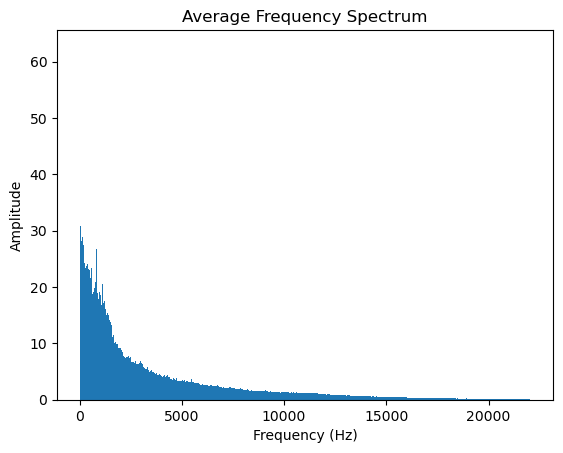

In [11]:

# Assuming 'waveforms' is a list or array of individual waveforms
spectra = []

for waveform in audio_data_padded_44100:
    # Optional: Remove DC component (mean subtraction)
    #waveform = waveform[0] - np.mean(waveform[0])
    
    # Perform Fourier Transform
    spectrum = np.fft.fft(waveform[0])
    amplitude = np.abs(spectrum) / len(waveform)
    
    # Store the amplitude spectrum
    spectra.append(amplitude)

# print(spectra)
# Convert the list of spectra to a NumPy array for easy averaging
spectra = np.array(spectra)

# Compute the average spectrum
avg_spectrum = np.mean(spectra, axis=0)

# Plot the average frequency spectrum
frequencies = np.fft.fftfreq(len(avg_spectrum), 1/44100)  # Frequency bins
plt.bar(frequencies[:len(frequencies)//2], avg_spectrum[:len(avg_spectrum)//2], width=frequencies[1]-frequencies[0])
plt.title('Average Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [2]:
audio_data = load_data('data/mnist')

{48000}
